In [1]:
import pyatomdb

In [2]:
%%capture
from threeML import *
modapec = APEC()
modapec.abundance_table='Allen'

In [3]:
modapec.display()

* description: The Astrophysical Plasma Emission Code (APEC, Smith et al. 2001) contributed
    * by Dominique Eckert
  * formula: $n.a.$
  * parameters:
    * K:
      * value: 1.0
      * desc: Normalization in units of 1e-14/(4*pi*(1+z)^2*dA*2)*EM
      * min_value: 1.0e-30
      * max_value: 1000.0
      * unit: ''
      * is_normalization: true
      * delta: 0.1
      * free: true
    * kT:
      * value: 1.0
      * desc: Plasma temperature
      * min_value: 0.08
      * max_value: 64.0
      * unit: ''
      * is_normalization: false
      * delta: 0.1
      * free: true
    * abund:
      * value: 1.0
      * desc: Metal abundance
      * min_value: 0.0
      * max_value: 5.0
      * unit: ''
      * is_normalization: false
      * delta: 0.01
      * free: false
    * redshift:
      * value: 0.0
      * desc: Source redshift
      * min_value: 0.0
      * max_value: 10.0
      * unit: ''
      * is_normalization: false
      * delta: 0.001
      * free: false
    * abundance_table:
      * value: Allen
      * desc: the abundance table for the model
      * allowed values:
      * - Allen
      * - AG89
      * - GA88
      * - Feldman
      * - GA10
      * - Lodd09
      * - AE8
      * defer: false
      * function: _init_session

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

%matplotlib inline 
# qt

energies = np.logspace(-1., 1.5, 2000) # Set up the energy grid ## energy resoultion
ktgrid   = [0.2,0.5,1.0,2.0,3.0,5.0,7.0,9.0,12.0,15.0] # Temperature grid ## for running d/f temp value models
Zgrid    = [0., 0.1, 0.3, 0.5, 1., 2.] # Metallicities wrt Solar

modapec.kT.value       = 1.0   # keV temperature
modapec.K.value        = 1e-2  # Normalization, proportional to emission measure
modapec.redshift.value = 0.    # Source redshift
modapec.abund.value    = 0.3   # The metal abundance of each element is set to 0.3 times the Solar abundance
#modapec.K.is_normalization = False # doesnot work

$Z/Z_\odot$=0.3


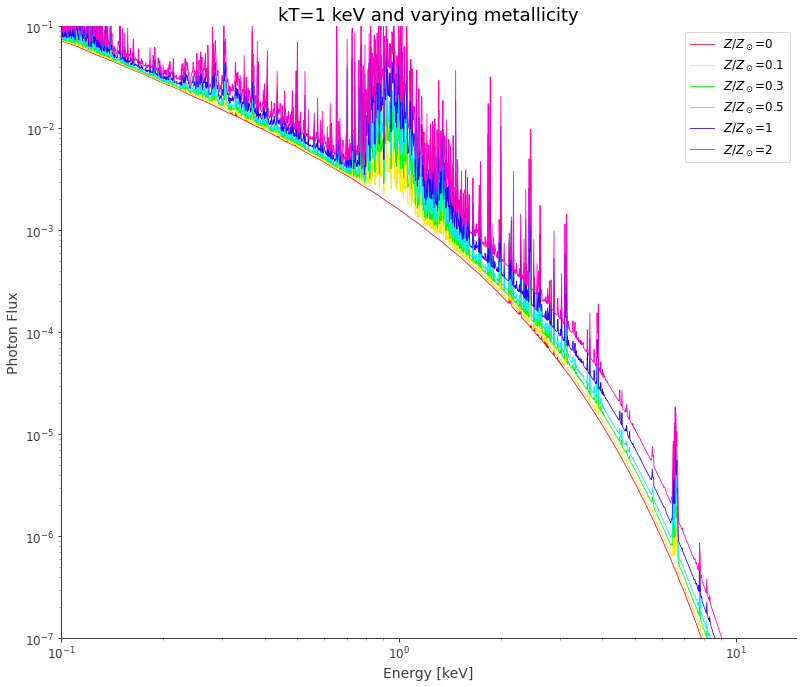

In [11]:
## apec model (at temperature kT and  different metallicities)
#plt.clf()
fig=plt.figure(0, figsize=(12,10))
ax = fig.add_axes([0.12, 0.12, 0.85, 0.85])
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

nspec = len(Zgrid)

values = range(nspec)
cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
ccc=[]
for i in range(nspec):
    ccc.append(scalarMap.to_rgba(i))

energies = np.logspace(-1., 1.5, 2000) # Set up the energy grid ## energy resoultion
for i in range(nspec):
    modapec.abund.value = Zgrid[i]
    plt.plot(energies,modapec(energies),color=ccc[i],label='$Z/Z_\odot$=%g'%(Zgrid[i]),linewidth=.8)
    if i==2:
        apec_flux=modapec(energies)
        apec_ener=energies
        print('$Z/Z_\odot$=%g'%(Zgrid[i]))

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [keV]',fontsize=14)
plt.ylabel('Photon Flux',fontsize=14)
plt.axis([0.1,15.,1e-7,0.1])
plt.title('kT=1 keV and varying metallicity',fontsize=18)
plt.legend(fontsize=12)
plt.show()

In [12]:
## useful constants
pi     = np.pi
pc     = 3.0856775807e18
kpc    = 1e3*pc
Mpc    = 1e3*kpc
e      = 4.8032e-10
s      = 1
cm     = 1
K      = 1
km     = 1e5*cm
mp     = 1.67262192369e-24
kB     = 1.3806505e-16
G      = 6.6726e-8
H0     = 67.4
H0cgs  = H0*((km/s)/Mpc)
dcrit0 = 3*H0cgs**2/(8.*pi*G) 
mu     = 0.6
Msun   = 2.e33
keV_erg = 1.60218e-9

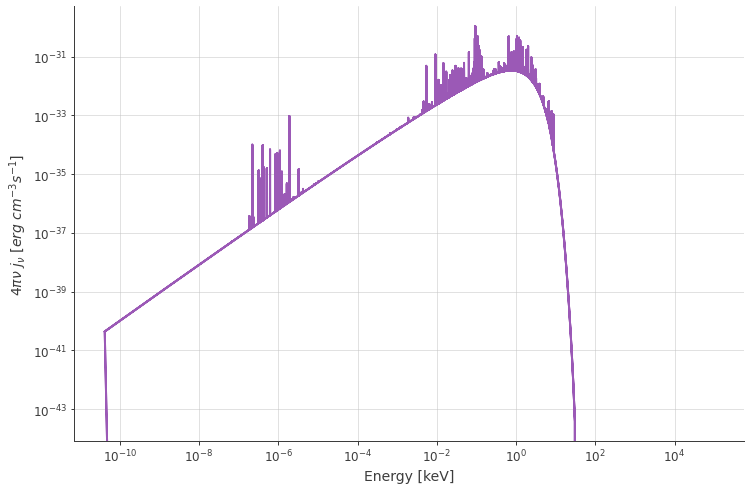

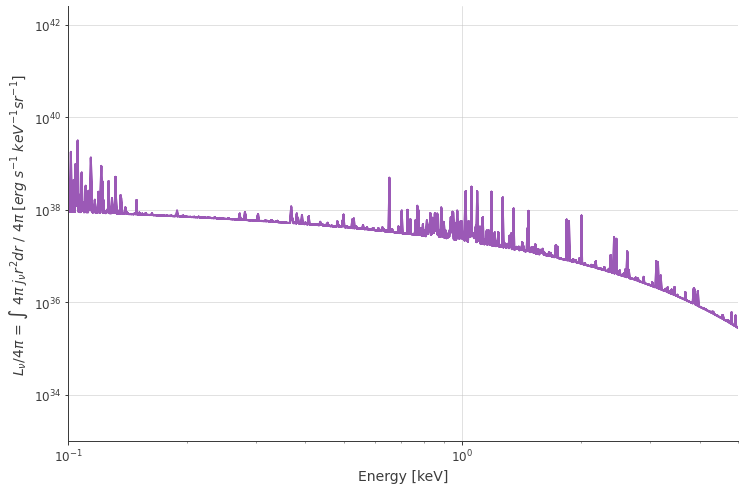

In [22]:
## faerman 2020 model parameters
faerman_model = np.loadtxt('fsm-emm.lin')
nu_keV     = faerman_model[:,0] # cloudy output => nu (keV)
total_emm  = faerman_model[:,3] # cloudy output => 4*pi*nu*j_nu (erg cm^-3 s^-1)
rad = 150*kpc;  dr  = 1*kpc
luminosity =  total_emm * 4*np.pi * rad**2 * dr / nu_keV # \int (4*pi*j_nu) * 4*pi*r^2 * dr (erg s^-1 keV^-1)

plt.figure(1, figsize=(12,8))
plt.plot(nu_keV, total_emm)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.grid()
plt.ylabel(r'4$\pi \nu$ $j_{\nu}$ [$erg\; cm^{-3} s^{-1}$]')
plt.show()

plt.figure(2, figsize=(12,8))
plt.plot(nu_keV, luminosity/(4*np.pi))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.grid()
plt.xlim(1e-1, 5)
plt.ylim(ymin=1e33) #(1e36, 1e41)
plt.ylabel(r'$L_{\nu}/4\pi$ = $\int$ 4$\pi$ $j_{\nu}r^2dr$ / $4\pi$ [$erg\; s^{-1} \; keV^{-1} sr^{-1}$]')
plt.show()

dist = 8.33e+02 kpc


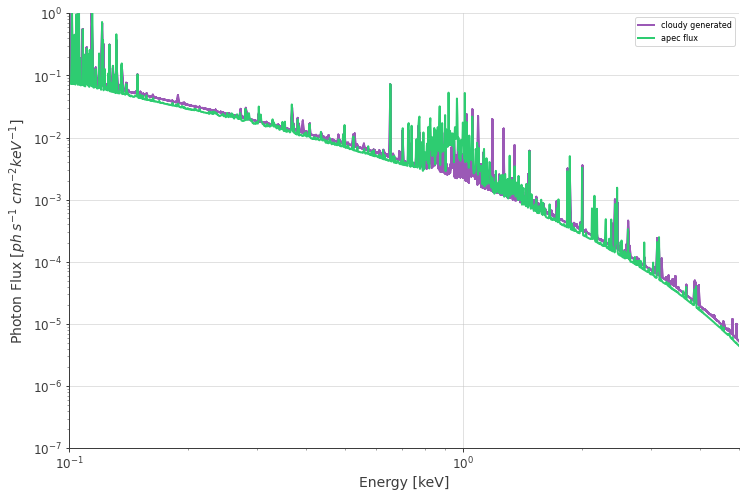

In [17]:
ndens = 1e-4   # hydrogen number density (cm^-3)
em    = ndens**2 * 4*np.pi * rad**2 * dr   # emission measure (cm^3)
K     = modapec.K.value #1e-3   # apec normalisation
dist  = np.sqrt(1e-14*em/(4*np.pi*K)) # (distance for flux comparison - cgs)
photon_flux = (luminosity * 4*np.pi /(nu_keV*keV_erg))/(4*np.pi*dist**2)
print('dist = %.2e kpc'%(dist/kpc))

## photon flux comparison for cloudy with apec
plt.figure(3, figsize=(12,8))
plt.plot(nu_keV, photon_flux, label='cloudy generated')
plt.plot(apec_ener, apec_flux,label='apec flux')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.grid()
plt.xlim(1e-1, 5)
plt.ylim(1e-7, 1)
plt.legend()
plt.ylabel(r'Photon Flux [$ph \; s^{-1}\; cm^{-2} keV^{-1}$]')
plt.show()

dist= 8.33e+02kpc


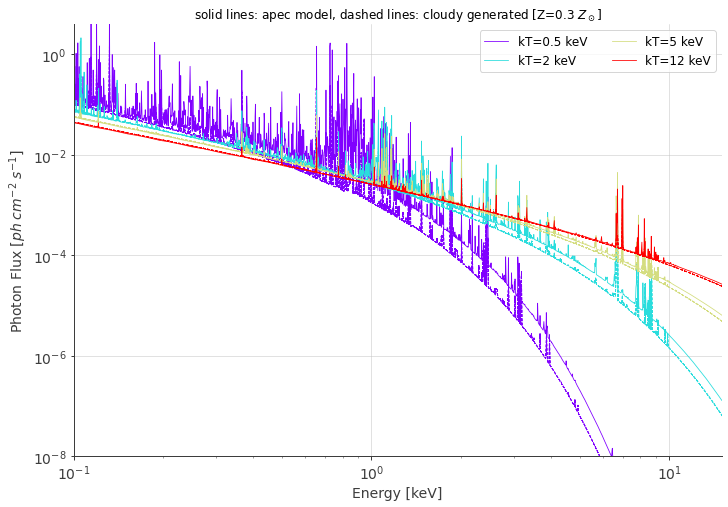

In [18]:
#plt.clf()
fig=plt.figure(4, figsize=(12,8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75])
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

ktgrid = [0.5, 2.0, 5.0, 12.0] # Temperature grid 
energies = np.logspace(-1., 2.5, 3000) # Set up the energy grid ## energy resoultion
nspec  = len(ktgrid)
values = range(nspec)

## faerman model parameters
file_name  = ['temp-.5-emm.lin', 'temp-2-emm.lin', 'temp-5-emm.lin', 'temp-12-emm.lin']

## color maping
cm = plt.get_cmap('rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
ccc=[]
for i in range(nspec):
    ccc.append(scalarMap.to_rgba(i))

# parameters for cloudy generated files
rad   = 150*kpc;  dr = 1*kpc
ndens = 1e-4  # hydrogen number density provided in cloudy model (cm^-3)
em    = ndens**2 * 4*np.pi * rad**2 * dr  # emission measure corresponding to it (cm^3)
K     = modapec.K.value # apec normalisation used 
dist  = np.sqrt(1e-14*em/(4*np.pi*K)) #cgs 
print('dist= %.2ekpc'%(dist/kpc))

# start plotting
for i in range(nspec):
    modapec.kT.value = ktgrid[i]
    # apec values
    plt.plot(energies, modapec(energies), color=ccc[i], label='kT=%g keV'%(ktgrid[i]), linewidth=.8)
    # cloudy file read
    cloudy_out  = np.loadtxt(file_name[i])
    nu_keV, total_emm = cloudy_out[:,0], cloudy_out[:,3] # cloudy output [nu (keV), 4*pi*nu*j_nu]
    luminosity  = total_emm *rad**2 *dr / nu_keV # erg s^-1 cm^-3 keV^-1 # 4*np.pi 
    photon_flux = (luminosity * 4*np.pi /(nu_keV*keV_erg)) / (4*np.pi*dist**2) # photons cm^-2 s^-1 
    # cloudy values
    plt.plot(nu_keV, photon_flux, color=ccc[i], ls='--', linewidth=.8)
    
plt.xscale('log')
plt.yscale('log')
plt.title('solid lines: apec model, dashed lines: cloudy generated [Z=0.3 $Z_\odot$]')
plt.xlabel('Energy [keV]')
plt.ylabel('Photon Flux [$ph \; cm^{-2} \; s^{-1}$]')
plt.axis([0.1,15.,1e-8,4.0])
# plt.title('Z=0.3 $Z_\odot$ and varying temperature')
plt.legend(fontsize=12, ncol=2)
plt.grid()